In [2]:
# 1. Importing required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
# 2. Importing the dataset
# dataset must be in the same directory or in the path

In [5]:
SuperStoreData = pd.read_csv("SampleSuperstoreO.csv")

In [6]:
# 3. Initial Data Inspection

In [7]:
SuperStoreData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Corporate,United States,Los Angeles,California,90045,West,Furniture,Tables,273.5680,2,0.20,10.2588
9990,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.32


In [8]:
SuperStoreData.describe()

,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203
std,32063.693350,623.245101,2.225110,0.206452
min,1040.000000,0.444000,1.000000,0.000000
25%,23223.000000,17.280000,2.000000,0.000000
50%,56430.500000,54.490000,3.000000,0.200000
75%,90008.000000,209.940000,5.000000,0.200000
max,99301.000000,22638.480000,14.000000,0.800000


In [9]:
SuperStoreData.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,899.1360,4,0.20,112.392
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.47


In [10]:
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.1+ KB


In [11]:
# 4. Data Wrangling
#check if there are any duplicate rows
SuperStoreData.duplicated().sum()

17

In [12]:
#First, dropping the identical rows from the dataframe. It seems safe to do so.
before_drop_rows = len(SuperStoreData.index)
SuperStoreData.drop_duplicates(keep= 'first',inplace=True)
after_drop_rows = len(SuperStoreData.index)
rows_dropped = before_drop_rows - after_drop_rows
print(rows_dropped,"rows dropped from SuperStoreData")

17 rows dropped from SuperStoreData


In [13]:
# Postal code seems to serve no purpose in the analysis
SuperStoreData=SuperStoreData.drop(['Country', 'Postal Code'], axis=1)

In [14]:
SuperStoreData[["Sales","Discount","Profit"]]
# Discount is unrelated to Salesand Profit numbers

,Sales,Discount,Profit
0,261.9600,0.00,41.9136
1,3083.4300,0.50,-1665.0522
2,14.6200,0.00,6.8714
3,532.3992,0.32,-46.9764
4,22.3680,0.20,2.5164
...,...,...,...
9989,273.5680,0.20,10.2588
9990,85.9800,0.00,22.3548
9991,258.5760,0.20,19.3932
9992,29.6000,0.00,13.32


In [15]:
# Creating a float Profit number, which is easier to work with
SuperStoreData['Profitn'] = pd.to_numeric(SuperStoreData['Profit'], errors='coerce')
print(SuperStoreData[['Profit','Profitn']])
type(SuperStoreData['Profitn'])

          Profit    Profitn
0        41.9136    41.9136
1     -1665.0522 -1665.0522
2         6.8714     6.8714
3       -46.9764   -46.9764
4         2.5164     2.5164
...          ...        ...
9989     10.2588    10.2588
9990     22.3548    22.3548
9991     19.3932    19.3932
9992       13.32    13.3200
9993      72.948    72.9480

[9977 rows x 2 columns]


pandas.core.series.Series

In [16]:
State_Sales = SuperStoreData.groupby("State").Sales.sum()
State_Profits = SuperStoreData.groupby("State").Profitn.sum()

In [17]:
# Calculating which are the top 10 states by sales
print(np.around(State_Sales.nlargest(10),2))

State
California      457576.27
New York        310827.15
Texas           170124.54
Washington      138560.81
Pennsylvania    116496.36
Florida          89473.71
Illinois         80162.54
Ohio             77976.76
Michigan         75879.64
Virginia         70636.72
Name: Sales, dtype: float64


In [219]:
# Calculating which are the top 10 states by profit
print(np.around(State_Profits.nlargest(10),2))

State
California    76215.97
New York      74006.16
Washington    33368.24
Michigan      24428.09
Virginia      18597.95
Indiana       18382.94
Georgia       16250.04
Kentucky      11199.70
Minnesota     10823.19
Delaware       9977.37
Name: Profitn, dtype: float64


In [ ]:
# Interestingly, the rankings of States by Sales and Profits bear little relation to each other. 

In [19]:
# Calculating the total sales and discount, using groupby
#Sales_and_Profits = SuperStoreData.groupby("Segment").sum().iloc[:,[1,-1]].sum() 
total_Sales = SuperStoreData['Sales'].sum()
total_Profits = SuperStoreData['Profitn'].astype(float).sum()
avg_Discount = SuperStoreData['Discount'].mean()
print(total_Sales, total_Profits, avg_Discount)

2296195.5903000003 286269.1162 0.15627844041296032


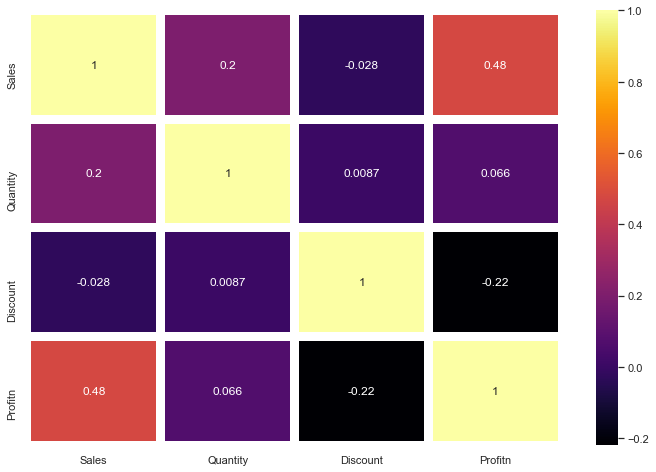

In [46]:
# displaying the correlation between Sales, Profit and Discount as a heatmap using sns
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(SuperStoreData.corr(),annot=True,cmap='inferno',lw=8,linecolor='white'
           )

In [47]:
# Interesting result: whilst sales and profit are positively correlated as expected, profits and discounts are negatively
# correlated. Note that this is at the aggregate level

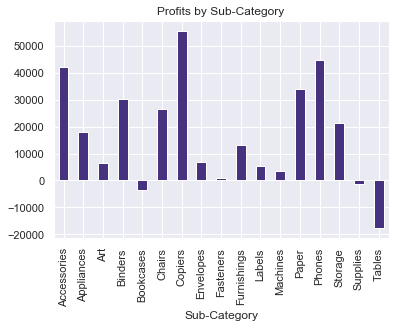

In [61]:
# The distribution of profits across sub-categories
SSD_seg_subs=SuperStoreData.groupby(["Sub-Category"])["Profitn"].sum()
SSD_seg_subs.plot.bar(title='Profits by Sub-Category')

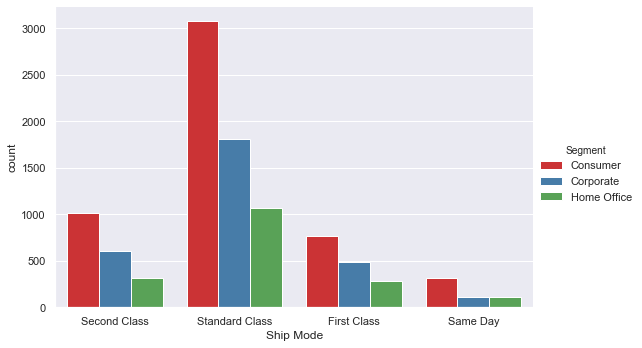

In [62]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=SuperStoreData, kind="count", aspect=1.5, palette="Set1")

In [ ]:
# Consumer seem to prefer Standard Class, which doesn't come as a surprise

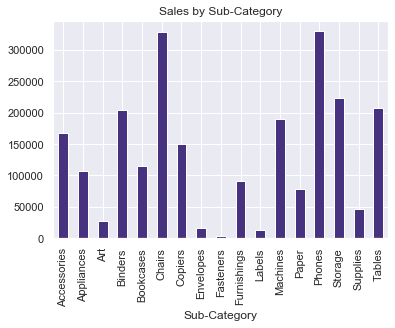

In [60]:
# Copiers are by far the most profitable, and Tables were loss-making
SSD_seg_subs=SuperStoreData.groupby(["Sub-Category"])["Sales"].sum()
SSD_seg_subs.plot.bar(title='Sales by Sub-Category')

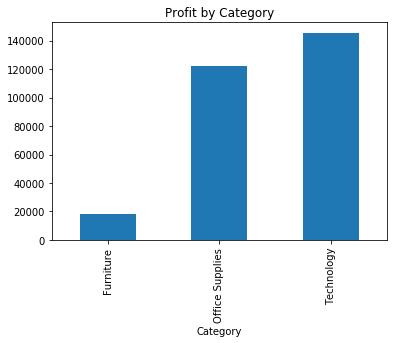

In [21]:
# Chairs and Phones are the biggest sellers, whereas Envelopes, Fasteners and Labels are very slow sellers
SSD_seg_subs=SuperStoreData.groupby(["Category"])["Profitn"].sum()
SSD_seg_subs.plot.bar(title='Profit by Category')

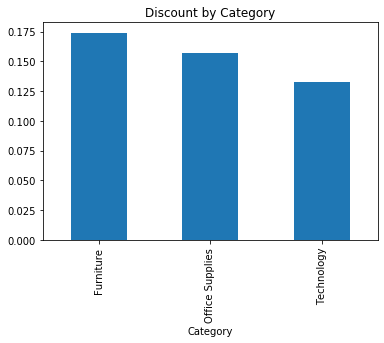

In [31]:
SSD_seg_subs=SuperStoreData.groupby(["Category"])["Discount"].mean()
SSD_seg_subs.plot.bar(title='Discount by Category')

In [ ]:
#Interestingly, Discounts appear far higher in the worst performing category

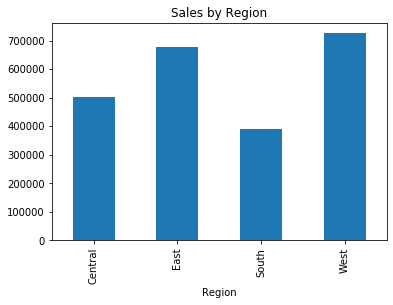

In [32]:
SSD_seg_subs=SuperStoreData.groupby(["Region"])["Sales"].sum()
SSD_seg_subs.plot.bar(title='Sales by Region')

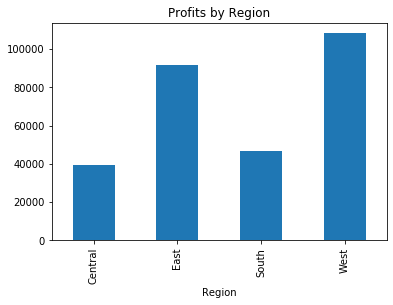

In [34]:
# South Region is the worst performing, followed by Central
SSD_seg_subs=SuperStoreData.groupby(["Region"])["Profitn"].sum()
SSD_seg_subs.plot.bar(title='Profits by Region')

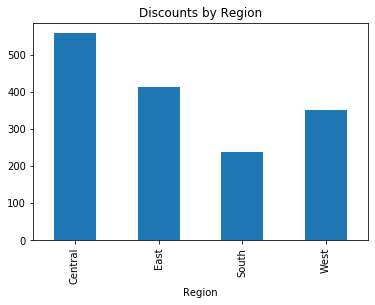

In [35]:
# Central Region is the worst performing region
SSD_seg_subs=SuperStoreData.groupby(["Region"])["Discount"].sum()
SSD_seg_subs.plot.bar(title='Discounts by Region')

In [ ]:
#Interestingly, Discounts appear far higher in the worst performing Region

In [36]:
# Discounts are thus higher in the worst performing Category (Furniture) and the worst performing region (Central)

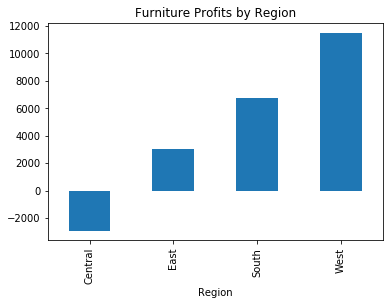

In [37]:
# Focusing on Furniture across Region:
df = SuperStoreData[SuperStoreData['Category']=="Furniture"]
SSD_seg_subs=df.groupby(["Region"])["Profitn"].sum()
SSD_seg_subs.plot.bar(title= 'Furniture Profits by Region')

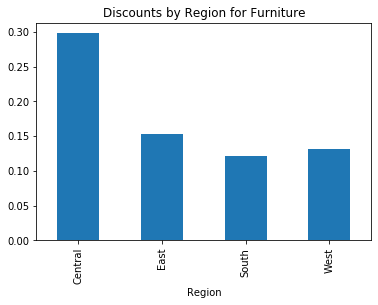

In [38]:
# Furniture performs poorly in the Central region
# Central region had, overall the highest average Discount  
# How do the levels of discount offered specifically for Furniture compare across Regions?
df = SuperStoreData[SuperStoreData['Category']=="Furniture"]
SSD_seg_subs=df.groupby(["Region"])["Discount"].mean()
SSD_seg_subs.plot.bar(title='Discounts by Region for Furniture')

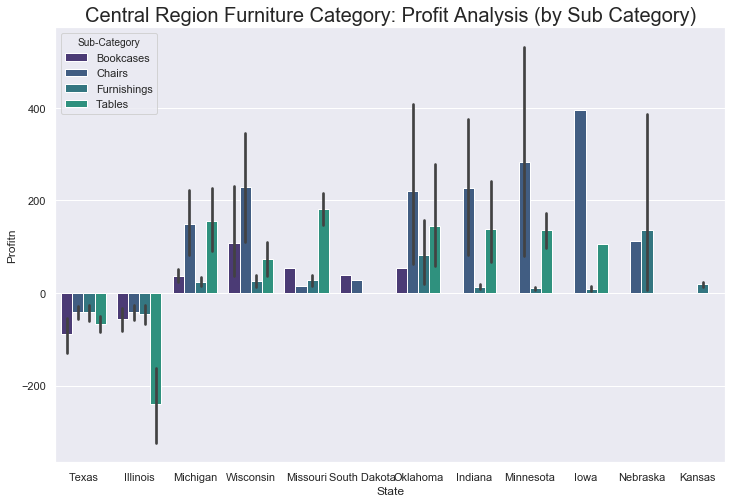

In [43]:
# Furniture performs worst in Central Region where the most discount is given!
# Is the issue across the Central Region,or more specifc to a State?
# Drilling into the Furniture Division within the Central Region
Furniture = SuperStoreData[SuperStoreData['Category']=="Furniture"]
Furniture = Furniture[Furniture['Region']=="Central"]
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = Furniture , x = "State",y = "Profitn" ,hue = "Sub-Category")
plt.title("Central Region Furniture Category: Profit Analysis (by Sub Category)", fontsize = 20)
plt.show()

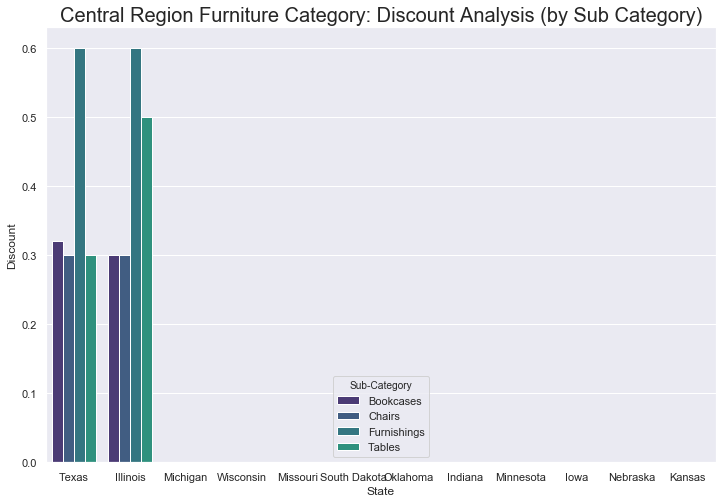

In [44]:
# Indiana and Texas stand out in the Central Region as the states experiencing losses on Furniture
# Is the issue the discounts given by those States?
# Drilling into the discounts given on Furniture within the Central Region's states:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Central Region Furniture Category: Discount Analysis (by Sub Category)", fontsize = 20)
plt.show()

In [ ]:
# Texas and Illinois are the sole discount granters in furniture amongst the Central Region states
# Their discounts range from
#                         60% on Furnishings by both states
#                         30% on Bookcases and Chairs by both states
#                         50% discount on Tables (Illinois) and 30% (Texas)

In [ ]:
# Major insights:
# 1. More Discount is given in the loss making Product sets (Furniture) compared to the profit market product sets
# 2. These discounts and hence losses are not uniformly spread, but are concentrated within Central Region
# 3. Even within Central region the discounts and losses are highly specific to ony 2 states, Texas and Illinois
# 4. Within Furniture, in Texas and Illionis, there is a uniformly high level of discount on furnishings (60%), as well as on 
#   bookcases and chairs (30%). However the sount s on Tables varies between the 2 states.